In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

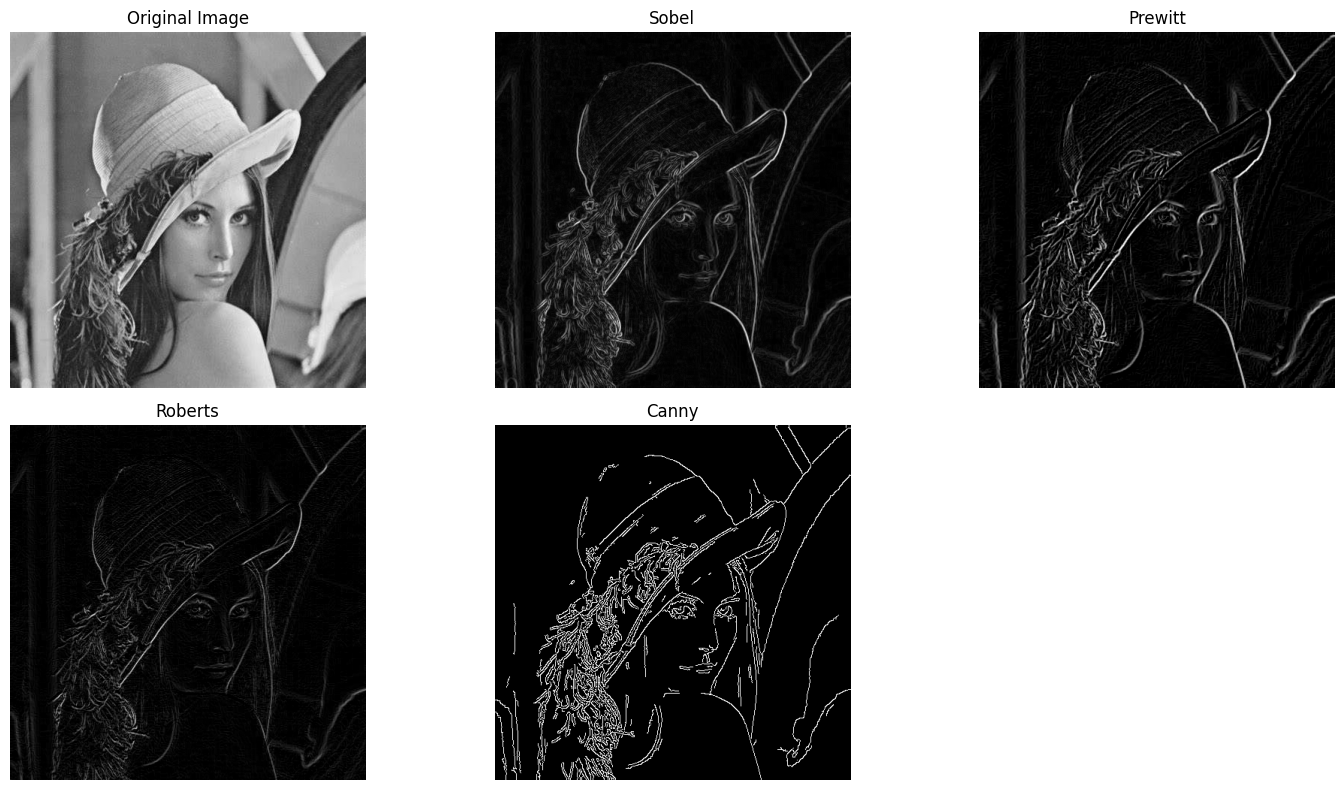

In [2]:
img = cv2.imread(r"C:\Users\Menaka\OneDrive\Pictures\lenna.jpg", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

prewitt_kernel_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]], dtype=np.float32)
prewitt_kernel_y = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]], dtype=np.float32)

prewitt_x = cv2.filter2D(img, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(img, -1, prewitt_kernel_y)
prewitt = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

roberts_kernel_x = np.array([[1, 0],
                             [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1],
                             [-1, 0]], dtype=np.float32)

roberts_x = cv2.filter2D(img, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(img, -1, roberts_kernel_y)
roberts = cv2.magnitude(roberts_x.astype(np.float32), roberts_y.astype(np.float32))

canny = cv2.Canny(img, 100, 200)

titles = ['Original Image', 'Sobel', 'Prewitt', 'Roberts', 'Canny']
images = [img, sobel, prewitt, roberts, canny]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


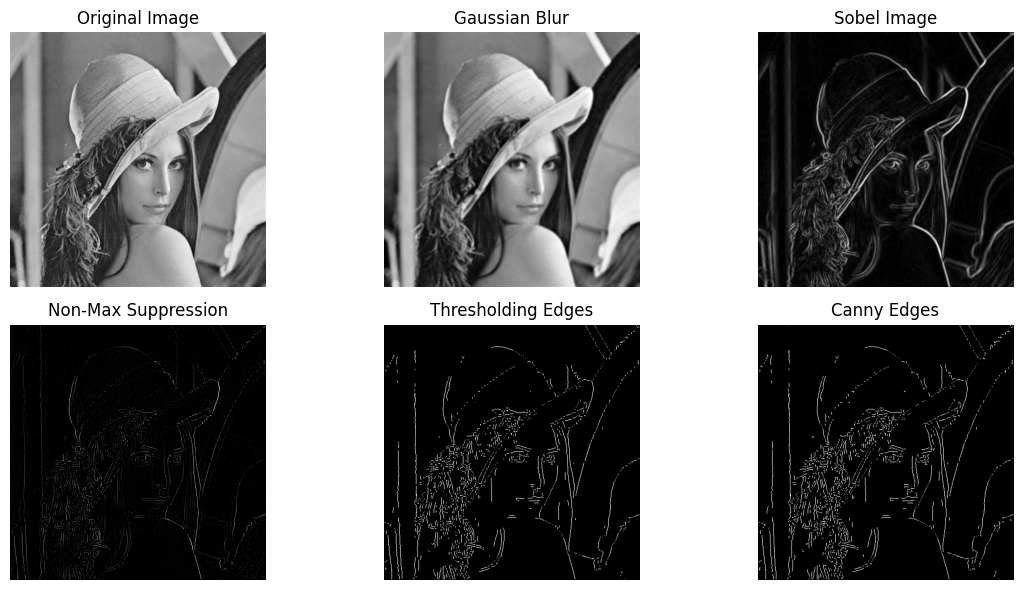

In [18]:
ig = cv2.imread(r"C:\Users\Menaka\OneDrive\Pictures\lenna.jpg", cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(ig, (5,5), 1.4) 

Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3) 
Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3) 

gradient_magnitude = np.sqrt(Gx**2 + Gy**2) 
gradient_direction = np.arctan2(Gy, Gx) 
suppressed = np.zeros_like(gradient_magnitude) 

angle = gradient_direction * (180.0 / np.pi) 
angle[angle < 0] += 180 
 
rows, cols = gradient_magnitude.shape 

for i in range(1, rows - 1): 
    for j in range(1, cols - 1): 

        try: 
         q = 255 
         r = 255 
         if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180): 
                q = gradient_magnitude[i, j + 1] 
                r = gradient_magnitude[i, j - 1] 
         elif (22.5 <= angle[i, j] < 67.5): 
                q = gradient_magnitude[i + 1, j - 1] 
                r = gradient_magnitude[i - 1, j + 1] 
         elif (67.5 <= angle[i, j] < 112.5): 
                q = gradient_magnitude[i + 1, j] 
                r = gradient_magnitude[i - 1, j] 
         elif (112.5 <= angle[i, j] < 157.5): 
                q = gradient_magnitude[i - 1, j - 1] 
                r = gradient_magnitude[i + 1, j + 1] 
 
         if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r): 
                suppressed[i, j] = gradient_magnitude[i, j] 
         else: 
                suppressed[i, j] = 0 
        except IndexError as e: 
            pass 
            
highThreshold = 75
lowThreshold = 25
 
strong_edges = (suppressed > highThreshold).astype(np.uint8) * 255 
weak_edges = ((suppressed <= highThreshold) & (suppressed >= lowThreshold)).astype(np.uint8) * 255 
 
final_edges = strong_edges.copy()

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if weak_edges[i, j] == 255:
            if (strong_edges[i - 1:i + 2, j - 1:j + 2] == 255).any():
                final_edges[i, j] = 255

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(ig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Sobel Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(suppressed, cmap='gray')
plt.title("Non-Max Suppression")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(strong_edges, cmap='gray')
plt.title("Thresholding Edges")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(final_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.tight_layout()
plt.show()


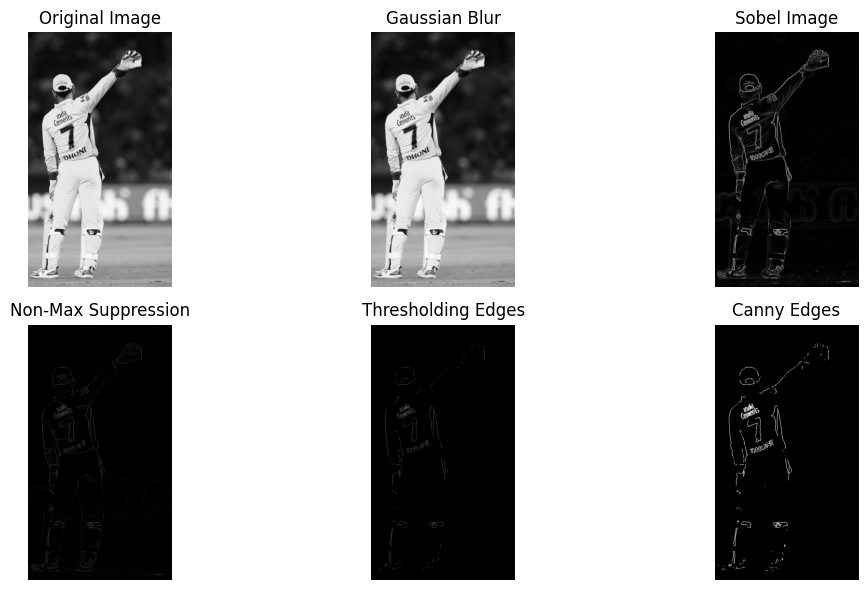

In [25]:
ig = cv2.imread(r"C:\Users\Menaka\OneDrive\Pictures\MS2.jpg" ,cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(ig, (5,5), 1.4) 

Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3) 
Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3) 

gradient_magnitude = np.sqrt(Gx**2 + Gy**2) 
gradient_direction = np.arctan2(Gy, Gx) 
suppressed = np.zeros_like(gradient_magnitude) 

angle = gradient_direction * (180.0 / np.pi) 
angle[angle < 0] += 180 
 
rows, cols = gradient_magnitude.shape 

for i in range(1, rows - 1): 
    for j in range(1, cols - 1): 

        try: 
         q = 255 
         r = 255 
         if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180): 
                q = gradient_magnitude[i, j + 1] 
                r = gradient_magnitude[i, j - 1] 
         elif (22.5 <= angle[i, j] < 67.5): 
                q = gradient_magnitude[i + 1, j - 1] 
                r = gradient_magnitude[i - 1, j + 1] 
         elif (67.5 <= angle[i, j] < 112.5): 
                q = gradient_magnitude[i + 1, j] 
                r = gradient_magnitude[i - 1, j] 
         elif (112.5 <= angle[i, j] < 157.5): 
                q = gradient_magnitude[i - 1, j - 1] 
                r = gradient_magnitude[i + 1, j + 1] 
 
         if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r): 
                suppressed[i, j] = gradient_magnitude[i, j] 
         else: 
                suppressed[i, j] = 0 
        except IndexError as e: 
            pass 
            
highThreshold = 300
lowThreshold = 0
 
strong_edges = (suppressed > highThreshold).astype(np.uint8) * 255 
weak_edges = ((suppressed <= highThreshold) & (suppressed >= lowThreshold)).astype(np.uint8) * 255 
 
final_edges = strong_edges.copy()

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if weak_edges[i, j] == 255:
            if (strong_edges[i - 1:i + 2, j - 1:j + 2] == 255).any():
                final_edges[i, j] = 255

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(ig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Sobel Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(suppressed, cmap='gray')
plt.title("Non-Max Suppression")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(strong_edges, cmap='gray')
plt.title("Thresholding Edges")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(final_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.tight_layout()
plt.show()


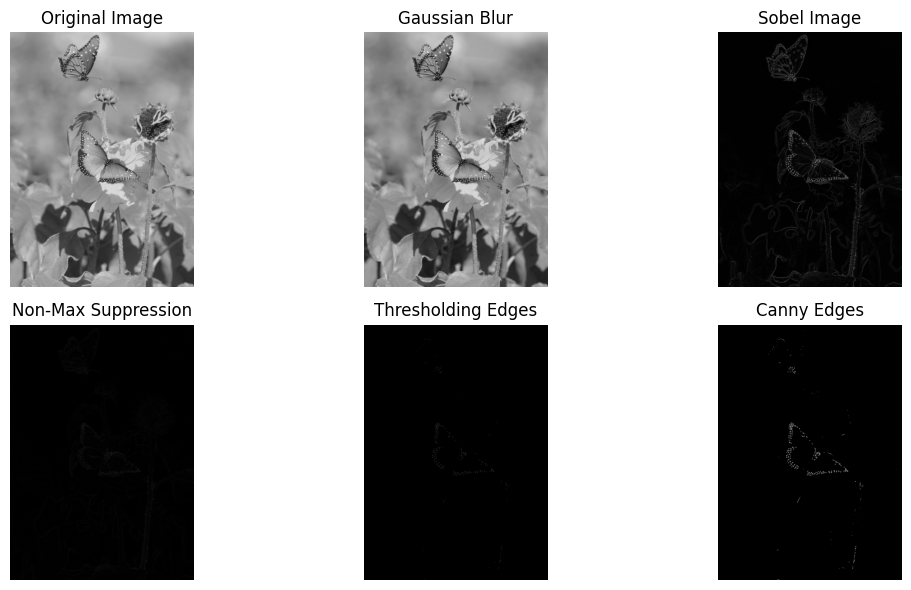

In [31]:
ig = cv2.imread(r"C:\Users\Menaka\Downloads\25.jpg" ,cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(ig, (5,5), 1.4) 

Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3) 
Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3) 

gradient_magnitude = np.sqrt(Gx**2 + Gy**2) 
gradient_direction = np.arctan2(Gy, Gx) 
suppressed = np.zeros_like(gradient_magnitude) 

angle = gradient_direction * (180.0 / np.pi) 
angle[angle < 0] += 180 
 
rows, cols = gradient_magnitude.shape 

for i in range(1, rows - 1): 
    for j in range(1, cols - 1): 

        try: 
         q = 255 
         r = 255 
         if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180): 
                q = gradient_magnitude[i, j + 1] 
                r = gradient_magnitude[i, j - 1] 
         elif (22.5 <= angle[i, j] < 67.5): 
                q = gradient_magnitude[i + 1, j - 1] 
                r = gradient_magnitude[i - 1, j + 1] 
         elif (67.5 <= angle[i, j] < 112.5): 
                q = gradient_magnitude[i + 1, j] 
                r = gradient_magnitude[i - 1, j] 
         elif (112.5 <= angle[i, j] < 157.5): 
                q = gradient_magnitude[i - 1, j - 1] 
                r = gradient_magnitude[i + 1, j + 1] 
 
         if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r): 
                suppressed[i, j] = gradient_magnitude[i, j] 
         else: 
                suppressed[i, j] = 0 
        except IndexError as e: 
            pass 
            
highThreshold = 200
lowThreshold = 0
 
strong_edges = (suppressed > highThreshold).astype(np.uint8) * 255 
weak_edges = ((suppressed <= highThreshold) & (suppressed >= lowThreshold)).astype(np.uint8) * 255 
 
final_edges = strong_edges.copy()

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if weak_edges[i, j] == 255:
            if (strong_edges[i - 1:i + 2, j - 1:j + 2] == 255).any():
                final_edges[i, j] = 255

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(ig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Sobel Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(suppressed, cmap='gray')
plt.title("Non-Max Suppression")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(strong_edges, cmap='gray')
plt.title("Thresholding Edges")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(final_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.tight_layout()
plt.show()


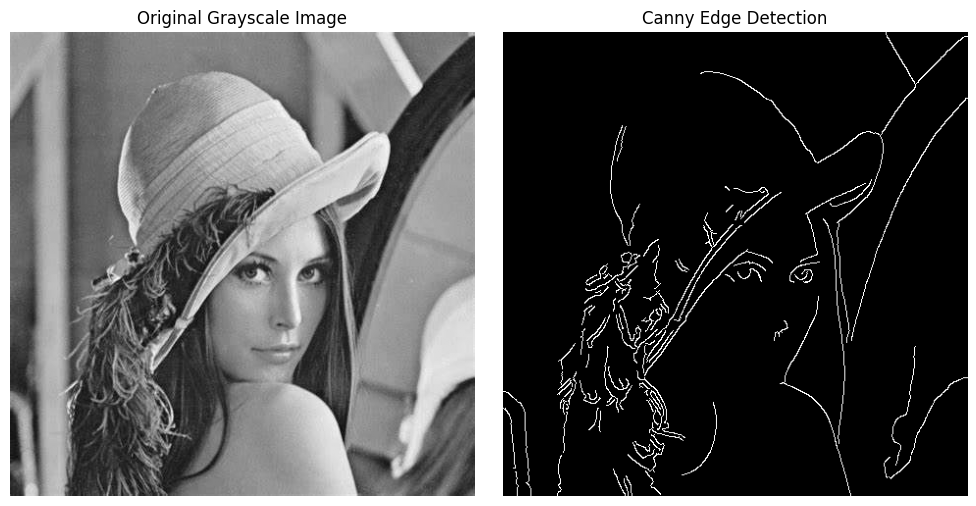

In [34]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r"C:\Users\Menaka\OneDrive\Pictures\lenna.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise (Step 1)
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection (Steps 2–5 are internal)
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display original and edge-detected images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()
